In [1]:
from __future__ import absolute_import
from keras.datasets import mnist
import numpy as np
import sys
sys.path.insert(0, '../sources')
from time import time

Using TensorFlow backend.


In [2]:
from layers import Input, Dense, Linear
from models import Model
import numpy as np
from losses import MSE, LogLoss
from optimizers import SGD
import matplotlib.pyplot as plt

In [16]:
def create_model():
    inp = Input(input_shape=(None, 28*28))
    X = inp
    X = Dense(100, 'sigmoid')(X)
    X = Dense(10, 'softmax')(X)
    model = Model(inputs=inp, outputs=X, losses=LogLoss(), optimizer=SGD(learning_rate=1e-2))
    return model

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
def generate_one_hot(y_labels):
    y = np.zeros((y_labels.shape[0], y_labels.max()+1))
    y[np.arange(y_labels.size), y_labels] = 1
    return y

def accuracy(y_hat, y):
    y_hat = np.argmax(y_hat, axis=1)
    y = np.argmax(y, axis=1)
    return np.sum((y_hat == y) * 1) / y.size

In [7]:
y = generate_one_hot(y_train)
x = x_train.reshape(x_train.shape[0], 28 * 28) / 256.

In [49]:
xval = x_test.reshape(x_test.shape[0], 28 * 28) / 256.
yval = generate_one_hot(y_test)

In [17]:
model = create_model()
accuracy(model.predict(x), y)

0.07725

In [18]:
losses = []

In [51]:
s = time()
for i in range(10):
    print('Epoch: ', i)
    loss = model.train(x, y)
    losses.append(loss)
e = time()
print(e - s)

Epoch:  0
Output Softmax_2. Loss: 0.6185897540953729
Epoch:  1
Output Softmax_2. Loss: 0.5971713917181043
Epoch:  2
Output Softmax_2. Loss: 0.5791075056569414
Epoch:  3
Output Softmax_2. Loss: 0.5638768482253016
Epoch:  4
Output Softmax_2. Loss: 0.5509700719142733
Epoch:  5
Output Softmax_2. Loss: 0.5400459250350138
Epoch:  6
Output Softmax_2. Loss: 0.530682399907786
Epoch:  7
Output Softmax_2. Loss: 0.5225541792655701
Epoch:  8
Output Softmax_2. Loss: 0.5156125034254654
Epoch:  9
Output Softmax_2. Loss: 0.5098095782316189
24.560497045516968


In [52]:
accuracy(model.predict(x), y)

0.83155

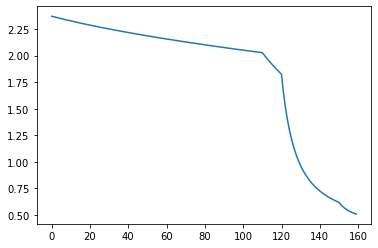

In [53]:
plt.plot(range(len(losses)), losses)

In [50]:
model._optimizer._learning_rate = 3

In [56]:
predictions = model.predict(xval)
accuracy(predictions, yval)

0.8386

In [59]:
labels = np.argmax(predictions, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [83]:
misses = np.where(labels != y_test)[0]

Prediction:  6
Real:  5


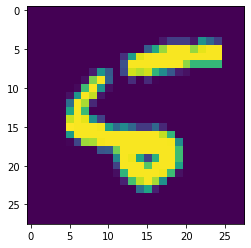

In [84]:
idx = misses[1]
print('Prediction: ', labels[idx])
print('Real: ', y_test[idx])
plt.imshow(x_test[idx])

In [ ]:
#WTF??